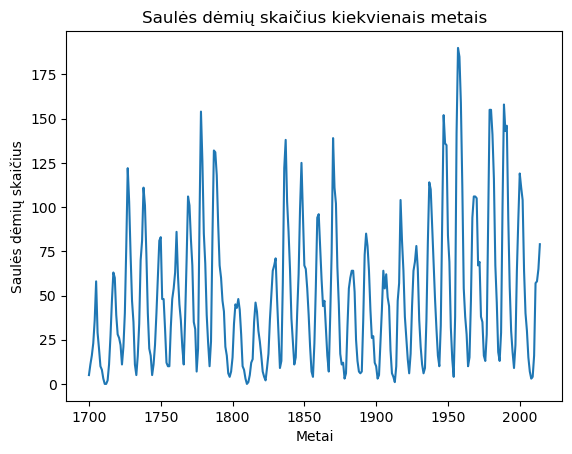

Įvesties sąrašo dydis: } 305
Išvesties sąrašo dydis:  305


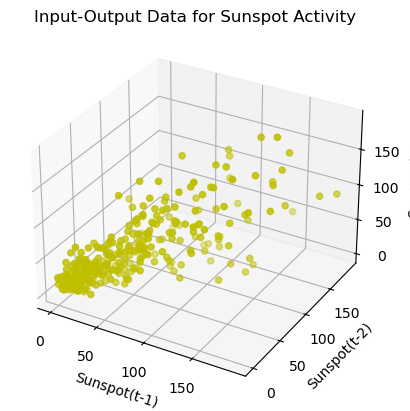

Eror vector: [  2.31948364   5.70845285   3.64372989   7.43605536   3.17572317
  -6.45347331 -14.04320139 -15.72117343  -3.84517291   4.06102299
  -9.87408794  -9.52143991  -1.68798464   6.08741174 -11.36182122
  -7.53370302 -23.82359873 -32.15255859  19.80512521  -1.857005
  -2.64979794  -4.55808526  12.20335907  -1.88891848  -4.29199274
   4.16824778 -10.11965452  13.54486409 -28.54076091   7.00381173
   5.79506659   0.72782757  -1.52548757  -6.56666803  15.59392574
   3.27656335   9.57224214   7.82304756   0.90431007  -8.75704444
  -2.92244499  19.43816428 -27.46601939   8.26102145   7.27096776
  -7.25728699   9.72033652 -10.71493974   5.424751     8.7130059
  -8.97579796 -23.1474634   21.97843041  -9.91154011  -8.56618716
   8.10195788   2.76908774 -22.25612064 -13.49303363 -22.42696671
  12.76723131   5.01596395  -6.32615861  18.01576496 -15.99525242
  19.61773723 -15.58884694 -55.70377217 -20.35796275  39.56896259
   9.87348011  -9.85241011  16.31222001  -2.65599015   3.82797332


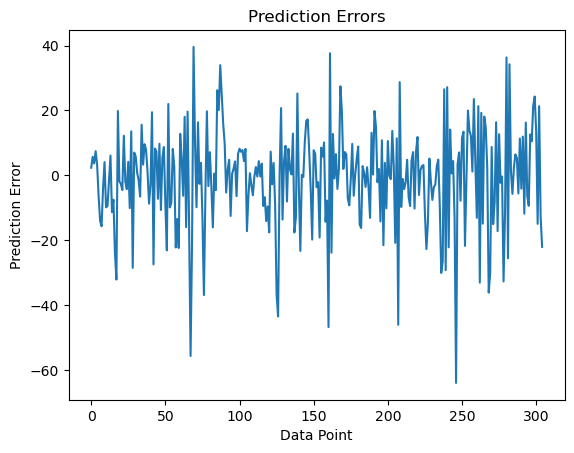

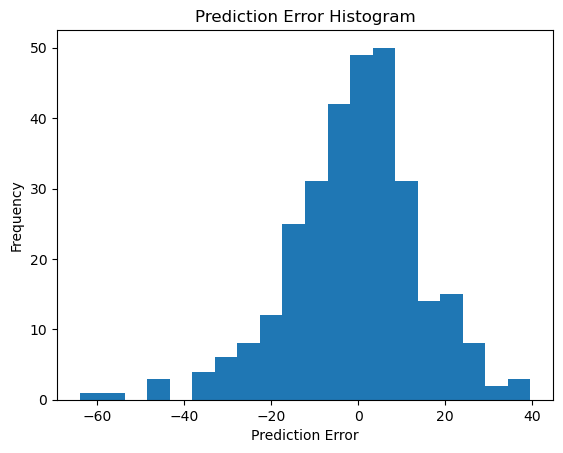

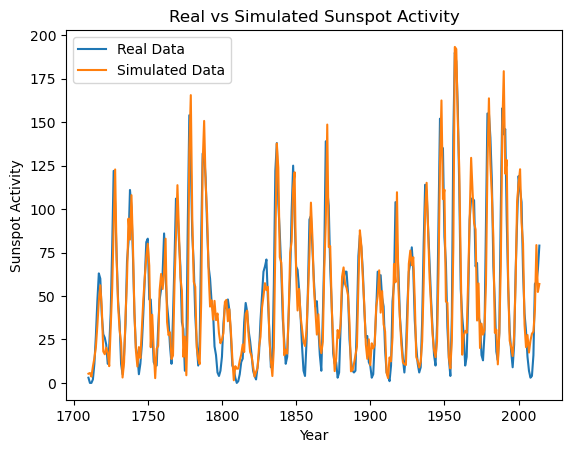

Optimal Coefficients:
w1: 0.039256888927783895
w2: 0.16276657081650947
b: 0.0027946647905834976


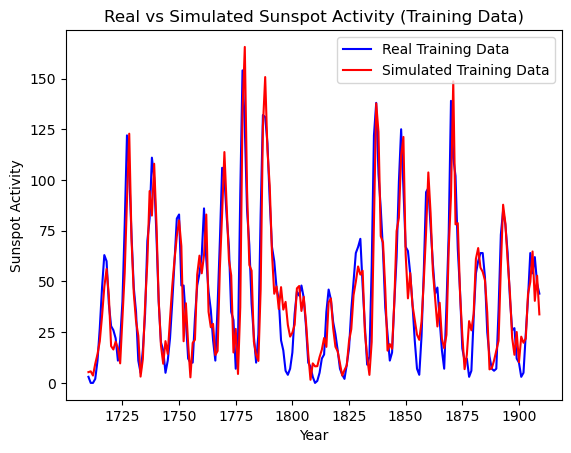

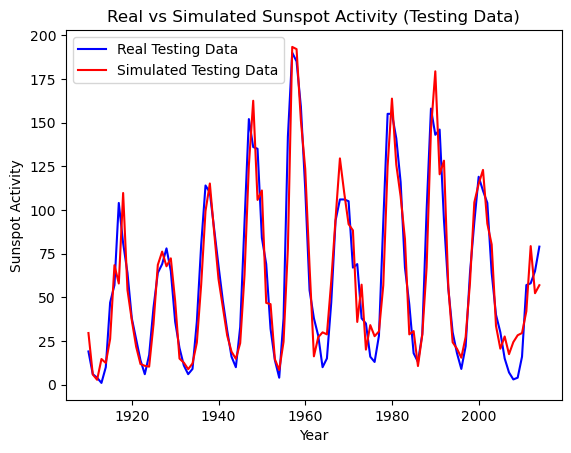

Mean Squared Error (MSE) for Training Data: 232.99920848782673
Median absolute deviation (MAD for Training Data: 0.42250980503746405
Mean Squared Error (MSE) for Testing Data: 295.73029008056676
Median absolute deviation (MAD for Testing Data: -1.0556294094603444


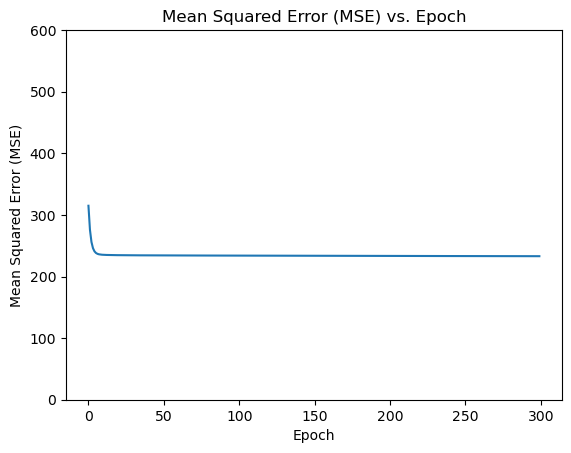

Training completed with learning rate: 1e-05
Weights:  [ 0.03535476  0.18038524  0.01633638 -0.01231641  0.07248573 -0.12074369
  0.1451869  -0.06411991 -0.51896198  1.25318279]
Bias: 0.0025126201071537253


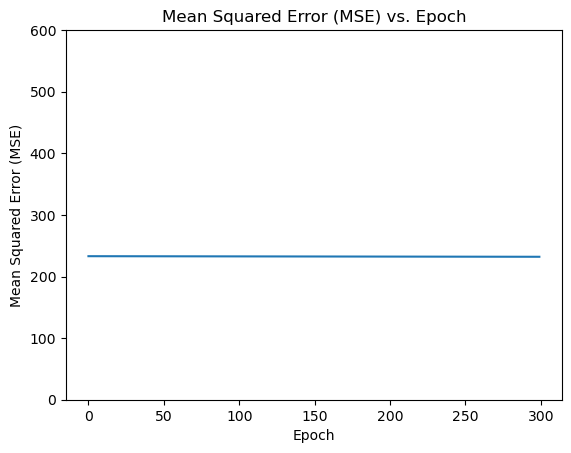

Mean Squared Error (MSE) for Training Data: 232.99920848782673
Median absolute deviation (MAD for Training Data: 0.42250980503746405
Mean Squared Error (MSE) for Testing Data: 295.73029008056676
Median absolute deviation (MAD for Testing Data: -1.0556294094603444


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define calculate_optimal_weights function
def calculate_optimal_weights(P, T):
    # Add bias term to the input matrix
    P_with_bias = np.hstack((P, np.ones((P.shape[0], 1))))

    # Calculate optimal weights using linear regression formula
    weights = np.linalg.inv(P_with_bias.T @ P_with_bias) @ P_with_bias.T @ T

    # Extract weights excluding the bias term
    optimal_weights = weights[:-1]

    return optimal_weights


# Load data
data = np.loadtxt('sunspot.txt')

# Data Visualization
years = data[:, 0]
sunspots = data[:, 1]
plt.plot(years, sunspots)
plt.xlabel('Metai')
plt.ylabel('Saulės dėmių skaičius')
plt.title('Saulės dėmių skaičius kiekvienais metais')
plt.show()

# Prepare Data for Neural Network
window_size = 10
X_train = []
y_train = []
for i in range(len(sunspots) - window_size):
    X_train.append(sunspots[i:i+window_size])
    y_train.append(sunspots[i+window_size])

X_train = np.array(X_train)
y_train = np.array(y_train)

# Extract the first 200 data points for training
Pu = X_train[:200]
Tu = y_train[:200]

print("Įvesties sąrašo dydis: }", len(X_train))
print("Išvesties sąrašo dydis: ", len(y_train))

# Calculate optimal weight coefficients for the training dataset
optimal_weights = calculate_optimal_weights(Pu, Tu)

# Build the Neural Network
class NeuralNetwork:
    def __init__(self):
        # Initialize weights and bias
        self.weights = optimal_weights
        self.bias = 0.0
    
    def forward(self, X):
        return np.dot(X, self.weights) + self.bias

# Train the Neural Network
network = NeuralNetwork()
learning_rate = 0.00001
epochs = 300
losses = []
for epoch in range(epochs):
    # Forward pass
    y_pred = network.forward(X_train)
    
    # Compute loss (MSE)
    loss = np.mean((y_pred - y_train) ** 2)
    losses.append(loss)

    # Backpropagation (Gradient Descent)
    grad_weights = np.dot(X_train.T, (y_pred - y_train)) / len(X_train)
    grad_bias = np.mean(y_pred - y_train)
    
    # Update weights and bias
    network.weights -= learning_rate * grad_weights
    network.bias -= learning_rate * grad_bias


    #print(f'Epoch {epoch}:')
    #print('Weights:', network.weights)
    #print('Bias:', network.bias)

# Visualization and Analysis
# Plot 3D graph (input-output data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='y', marker='o')
ax.set_xlabel('Sunspot(t-1)')
ax.set_ylabel('Sunspot(t-2)')
ax.set_zlabel('Sunspot(t)')
plt.title('Input-Output Data for Sunspot Activity')
plt.show()

# Step 8: Verify Model with Training Data
y_train_pred = network.forward(X_train)

# Step 9: Verify Model with Testing Data
# Assuming we have some testing data X_test and y_test

# Prediction Errors
e_train = y_train_pred - y_train
print("Eror vector:", e_train)
# Plot Prediction Errors
plt.plot(e_train)
plt.xlabel('Data Point')
plt.ylabel('Prediction Error')
plt.title('Prediction Errors')
plt.show()

# Error Histogram
plt.hist(e_train, bins=20)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Prediction Error Histogram')
plt.show()


plt.plot(years[window_size:], y_train, label='Real Data')
plt.plot(years[window_size:], y_train_pred, label='Simulated Data')
plt.xlabel('Year')
plt.ylabel('Sunspot Activity')
plt.title('Real vs Simulated Sunspot Activity')
plt.legend()
plt.show()

print("Optimal Coefficients:")
print("w1:", optimal_weights[0])
print("w2:", optimal_weights[1])
print("b:", network.bias)

# Verify Model with Training Data
Tsu_train = network.forward(Pu)

# Plot Training Data Verification
plt.plot(years[window_size:200+window_size], Tu, label='Real Training Data', color='blue')
plt.plot(years[window_size:200+window_size], Tsu_train, label='Simulated Training Data', color='red')
plt.xlabel('Year')
plt.ylabel('Sunspot Activity')
plt.title('Real vs Simulated Sunspot Activity (Training Data)')
plt.legend()
plt.show()

# Verify Model with Testing Data
X_test = []
y_test = []
for i in range(200, len(sunspots) - window_size):
    X_test.append(sunspots[i:i+window_size])
    y_test.append(sunspots[i+window_size])

X_test = np.array(X_test)
y_test = np.array(y_test)

Tsu_test = network.forward(X_test)

# Plot Testing Data Verification
plt.plot(years[200+window_size:], y_test, label='Real Testing Data', color='blue')
plt.plot(years[200+window_size:], Tsu_test, label='Simulated Testing Data', color='red')
plt.xlabel('Year')
plt.ylabel('Sunspot Activity')
plt.title('Real vs Simulated Sunspot Activity (Testing Data)')
plt.legend()
plt.show()

# Calculate Mean Squared Error (MSE) for Training Data
mse_train = np.mean(e_train ** 2)
print("Mean Squared Error (MSE) for Training Data:", mse_train)
mad_train = np.median(e_train)
print("Median absolute deviation (MAD for Training Data:", mad_train)
# Calculate Mean Squared Error (MSE) for Testing Data
e_test = y_test - Tsu_test
mse_test = np.mean(e_test ** 2)
print("Mean Squared Error (MSE) for Testing Data:", mse_test)
mad_test = np.median(e_test)
print("Median absolute deviation (MAD for Testing Data:", mad_test)


#Plotting the MSE for each epoch
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) vs. Epoch')
plt.ylim(0, 600)
plt.show()

learning_rates = [ 0.00001, 0.00005, 0.00001, 0.00005, 0.0001, 0.0005, 0.001]
network = NeuralNetwork()
learning_rate = learning_rates[0]
epochs = 300
losses = []
for epoch in range(epochs):
    # Forward pass
    y_pred = network.forward(X_train)

#Compute loss (MSE)
    loss = np.mean((y_pred - y_train) ** 2)
    losses.append(loss)

#Backpropagation (Gradient Descent)
    grad_weights = np.dot(X_train.T, (y_pred - y_train)) / len(X_train)
    grad_bias = np.mean(y_pred - y_train)

#Update weights and bias
    network.weights -= learning_rate * grad_weights
    network.bias -= learning_rate * grad_bias
    
print(f"Training completed with learning rate: {learning_rate}")
print("Weights: ", network.weights)
print("Bias:", network.bias)


#Plotting the MSE for each epoch
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) vs. Epoch')
plt.ylim(0, 600)
plt.show()
# Calculate Mean Squared Error (MSE) for Training Data
mse_train = np.mean(e_train ** 2)
print("Mean Squared Error (MSE) for Training Data:", mse_train)
mad_train = np.median(e_train)
print("Median absolute deviation (MAD for Training Data:", mad_train)
# Calculate Mean Squared Error (MSE) for Testing Data
e_test = y_test - Tsu_test
mse_test = np.mean(e_test ** 2)
print("Mean Squared Error (MSE) for Testing Data:", mse_test)
mad_test = np.median(e_test)
print("Median absolute deviation (MAD for Testing Data:", mad_test)

